In [10]:
import pymc
import numpy as np
import pandas as pd
import xarray as xr
import copy
import matplotlib.pyplot as plt
import pygemfxns_ensemble_sampling as es
import glob
import os
import run_calibration_list_multiprocess as rc
from pandas.plotting import autocorrelation_plot
import pygemfxns_ensemble_sampling as es
import matplotlib.mlab as mlab
from jupyterthemes import jtplot
from scipy.stats import gaussian_kde
import scipy.stats as stats 

jtplot.style('grade3', fscale=1.3)
jtplot.figsize(x=18, y=10)

In [7]:
filelist = glob.glob(os.path.join('*10000.pickle'))
print(filelist)
traces = {}
for f in filelist:
    print(f)
    name = f[:-18]
    samples = f[-12:-7]
    print(name, samples)
    traces[name] = pymc.database.pickle.load(f)

['test5length10000.pickle', 'testlength10000.pickle', 'test2length10000.pickle']
test5length10000.pickle
test5 10000
testlength10000.pickle
test 10000
test2length10000.pickle
test2 10000


In [8]:
traces

{'test5': <pymc.database.pickle.Database at 0x7fd42bcfe0f0>,
 'test': <pymc.database.pickle.Database at 0x7fd42bcfe208>,
 'test2': <pymc.database.pickle.Database at 0x7fd42bcfb6a0>}

In [131]:
filelist = glob.glob(os.path.join('../MCMC_data/' , '*.nc'))
print(filelist)
ensembles = {}
samples = []
for f in filelist:
    print(f)
    name = f[38:-32]
    samples.append(name)
    print(name)
    ds = xr.open_dataset(f)
    ensembles[name] = ds

['../MCMC_data/parameter_sets_4glaciers_10000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_5000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_1000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_30000samples_200ensembles_20180727.nc', '../MCMC_data/parameter_sets_4glaciers_3000samples_200ensembles_20180727.nc']
../MCMC_data/parameter_sets_4glaciers_10000samples_200ensembles_20180727.nc
10000
../MCMC_data/parameter_sets_4glaciers_5000samples_200ensembles_20180727.nc
5000
../MCMC_data/parameter_sets_4glaciers_1000samples_200ensembles_20180727.nc
1000
../MCMC_data/parameter_sets_4glaciers_30000samples_200ensembles_20180727.nc
30000
../MCMC_data/parameter_sets_4glaciers_3000samples_200ensembles_20180727.nc
3000


In [134]:
glaciers = ['15.1006', '15.10059', '15.10075', '15.10079']
variabl = ['massbal']#, 'precfactor', 'ddfsnow', 'massbal']
samples.sort()
samples = ['1000', '3000', '5000', '10000', '30000']

In [141]:
def get_glacier_data(glacier_number):
            '''
            Returns the mass balance and error estimate for
            the glacier from David Shean's DEM data


            Parameters
            ----------
            glacier_number : float
                RGI Id of the glacier for which data is to be
                returned. Should be a number with a one or two
                digit component before the decimal place
                signifying glacier region, and 5 numbers after
                the decimal which represent glacier number.
                Example: 15.03733 for glacier 3733 in region 15


            Returns
            -------
            (tuple)
            massbal : float
                average annual massbalance over david sheans's
                dataset
            stdev : float
                estimate error (standard deviation) of measurement
            index : int
                index of glacier in csv file for debugging

            '''

            #convert input to float
            glacier_number = float(glacier_number)

            # upload csv file of DEM data and convert to
            # dataframe
            csv_path = '../DEMs/hma_mb_20171211_1343.csv'
            df = pd.read_csv(csv_path)

            # locate the row corresponding to the glacier
            # with the given RGIId number
            row = df.loc[round(df['RGIId'], 5) == glacier_number]

            # get massbalance, measurement error (standard
            # deviation) and index of the
            # glacier (index for debugging purposes)
            index = row.index[0]
            massbal = row['mb_mwea'][index]
            stdev = row['mb_mwea_sigma'][index]

            return massbal, stdev, index

In [153]:
np.mean(ensembles['30000']['15.10075'].sel(variables='massbal').values)

0.25761620229183041

In [148]:

for glac in glaciers:
    print(glac)
    mean, std, index = get_glacier_data(float(glac))
    print('observed mean, std:', mean, std, index)
    #for key, val in ensembles.items():
    for sample in samples:
        val = ensembles[sample]
        print(sample)
    
        for var in variabl:
            print(var)
            mean = np.mean(val[glac].sel(variables=var).values)
            std = np.std(val[glac].sel(variables=var).values)
            print('mean:', mean, 'std:', std)
        

15.1006
observed mean, std: -0.041 0.239 3
1000
massbal
mean: 0.0485333188266 std: 0.237568151107
3000
massbal
mean: 0.067505779678 std: 0.255946164863
5000
massbal
mean: 0.0580876731769 std: 0.250958968707
10000
massbal
mean: 0.0462780729628 std: 0.242817111123
30000
massbal
mean: 0.0564343342403 std: 0.251202397916
15.10059
observed mean, std: 0.074 0.237 2
1000
massbal
mean: 0.216274570474 std: 0.244817067067
3000
massbal
mean: 0.261092985526 std: 0.266327055556
5000
massbal
mean: 0.205778161922 std: 0.24982517005
10000
massbal
mean: 0.194019513758 std: 0.249969279872
30000
massbal
mean: 0.196155249536 std: 0.250257559106
15.10075
observed mean, std: 0.084 0.24 0
1000
massbal
mean: 0.296195645042 std: 0.260783993624
3000
massbal
mean: 0.204392290351 std: 0.254536689438
5000
massbal
mean: 0.241138062934 std: 0.254339059152
10000
massbal
mean: 0.274163802237 std: 0.264499436747
30000
massbal
mean: 0.257616202292 std: 0.263810390215
15.10079
observed mean, std: 0.082 0.238 1
1000
massb

/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


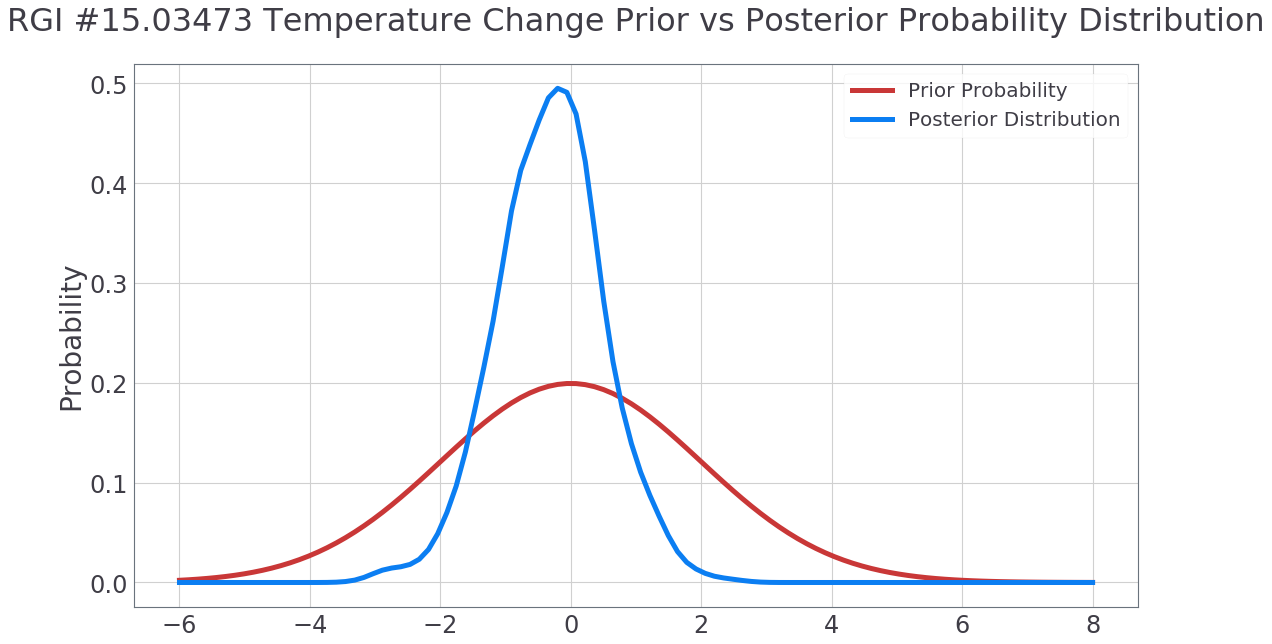

../probability_plots/03473tempchange.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


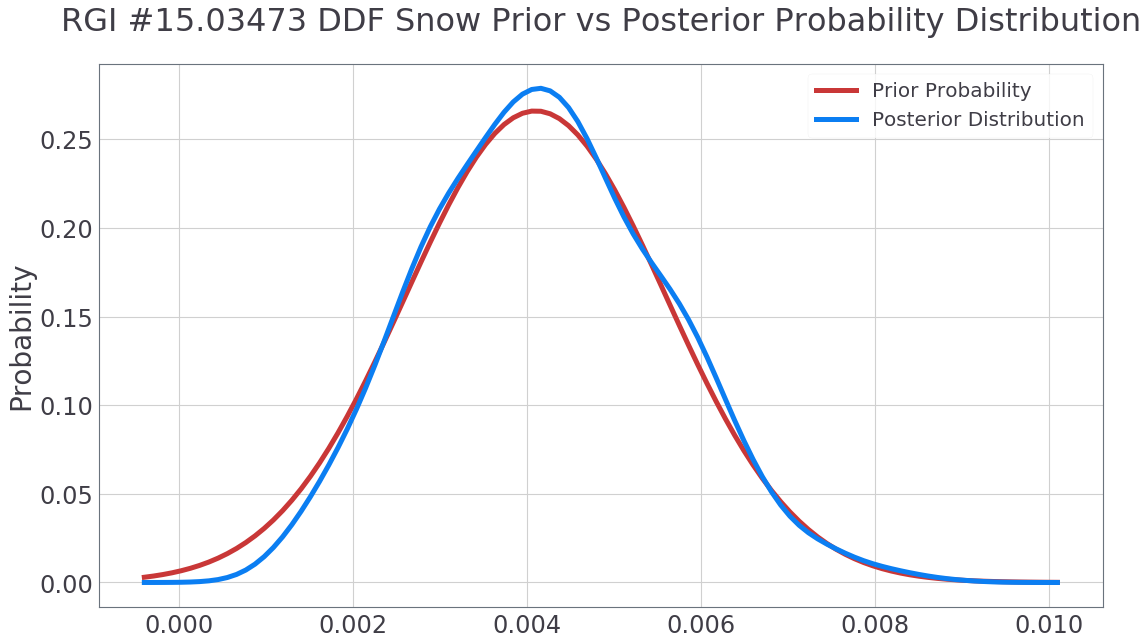

../probability_plots/03473ddfsnow.png


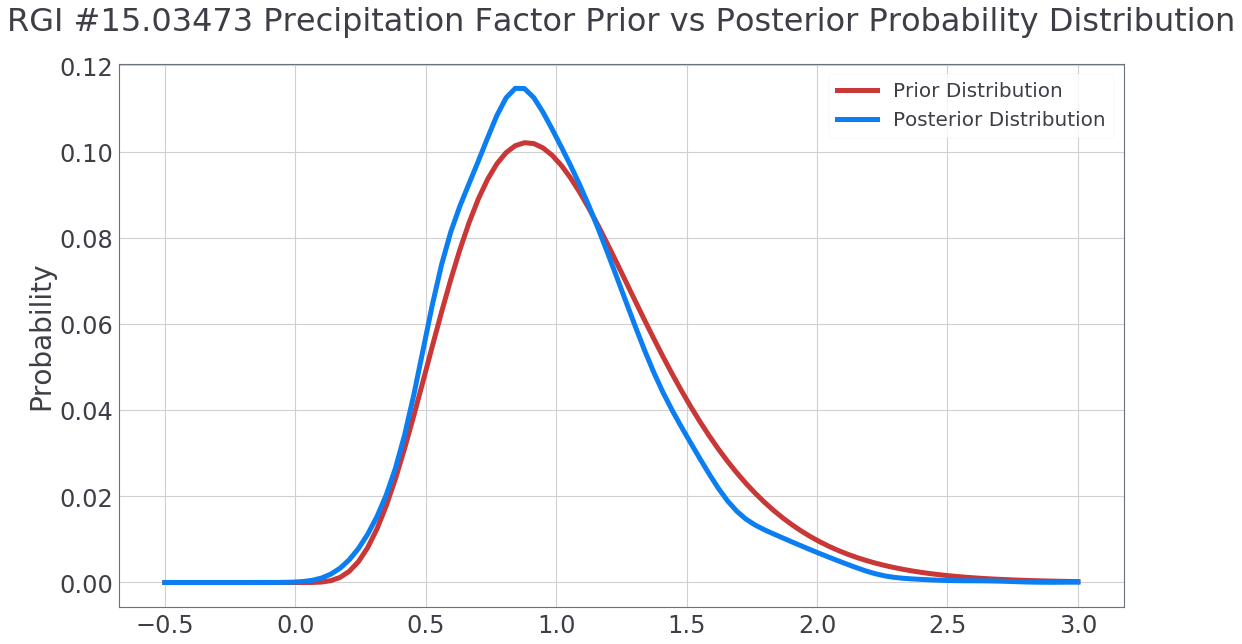

../probability_plots/03473precfactor.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


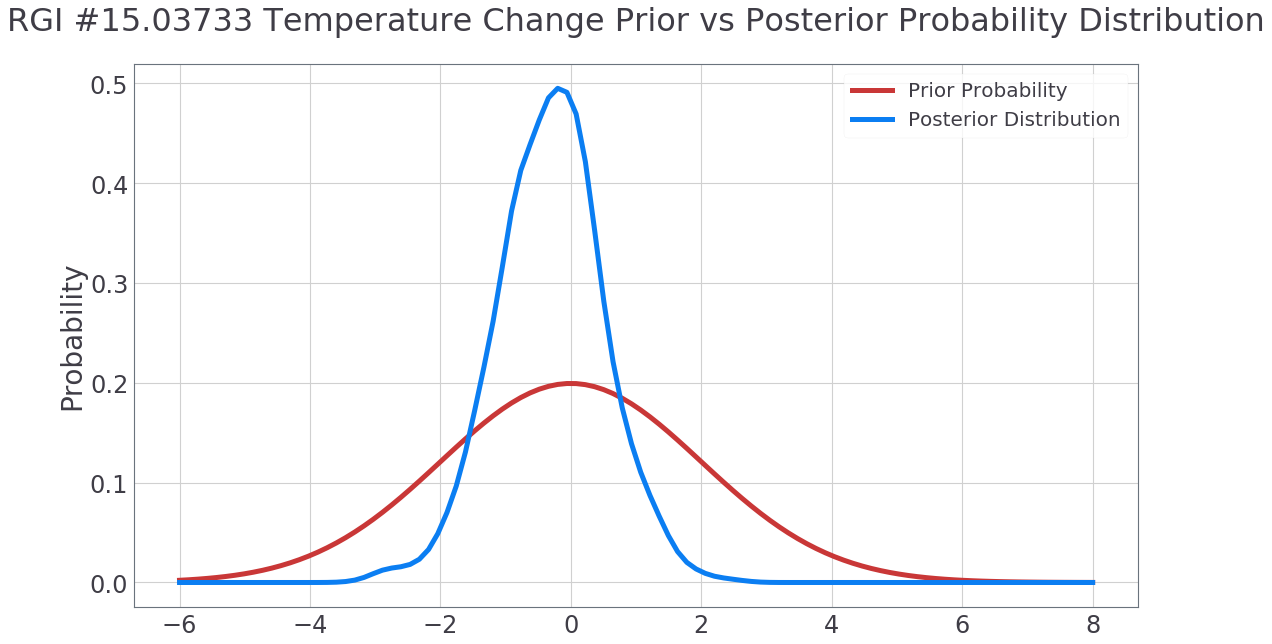

../probability_plots/03733tempchange.png


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


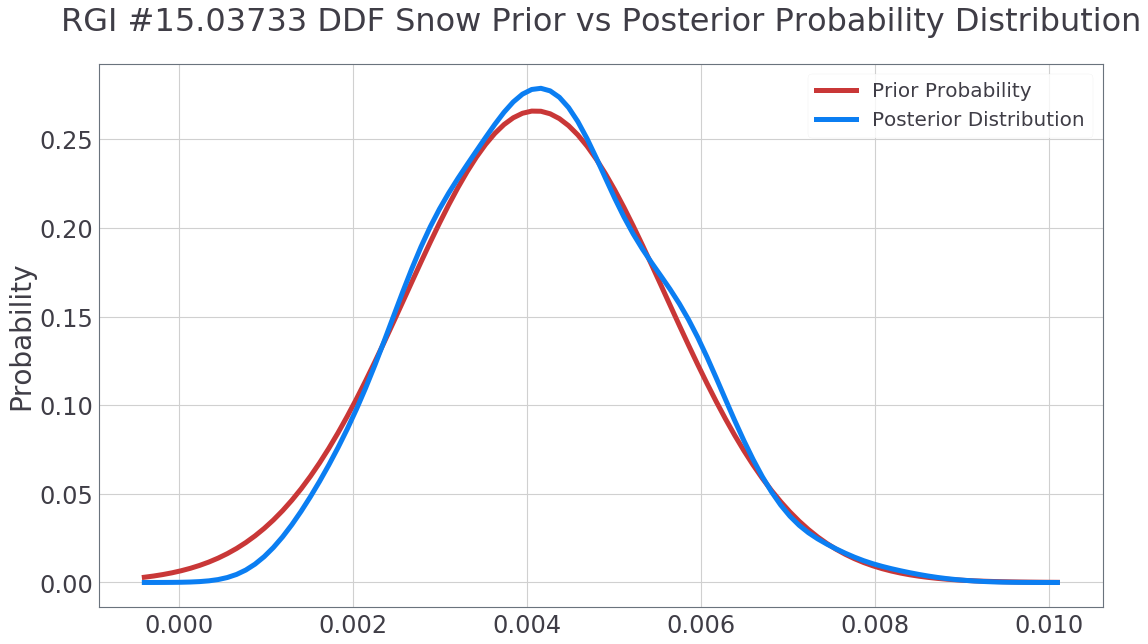

../probability_plots/03733ddfsnow.png


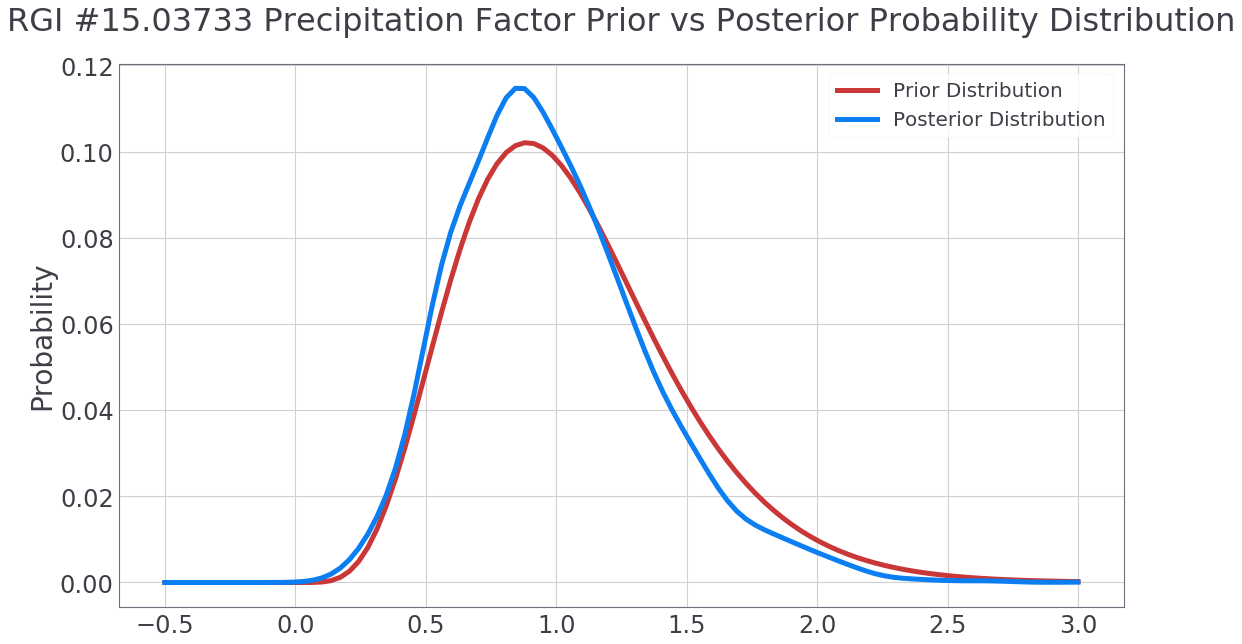

../probability_plots/03733precfactor.png


In [12]:
names = ['test2', 'test5']
nums = ['03473', '03733']
params = {'tempchange':'Temperature Change', 'ddfsnow': 'DDF Snow', 'precfactor': 'Precipitation Factor'}
colors = [ '#C93737', '#0B7EF2', '#4C0099', '#CC6600']

for num in nums:

    i = 0

    for key, value in params.items():

        fig = plt.figure()

        data = traces[name].trace(key)[:]

        if key == 'tempchange':

            # plot the ideal pdf function
            mu = 0
            sigma = 2
            x = np.linspace(mu - 3*sigma, mu + 4*sigma, 100)
            plt.plot(x,mlab.normpdf(x, mu, sigma), color=colors[0], label = 'Prior Probability', linewidth=5)


            # plot the actual density distribution
            density = gaussian_kde(data)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(x,density(x), label = 'Posterior Distribution', color=colors[1], linewidth=5)


        elif key == 'ddfsnow':
            # plot the ideal pdf function
            mu = 0.0041
            sigma = 0.0015
            x = np.linspace(mu - 3*sigma, mu + 4*sigma, 100)
            plt.plot(x, mlab.normpdf(x, mu, sigma) /1000, color=colors[0], label = 'Prior Probability', linewidth=5)

            # plot the actual density distribution
            density = gaussian_kde(data)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(x, density(x) / 1000, label = 'Posterior Distribution', linewidth=5, color=colors[1])

        elif key == 'precfactor':
            x = np.linspace (-0.5, 3.0, 100) 
            y = stats.gamma.pdf(x, a= 6.33, scale=(1/6)) #a is alpha, loc is beta???
            plt.plot(x, y /10, linewidth =5, label='Prior Distribution', color=colors[0])

            # plot the actual density distribution
            density = gaussian_kde(data)
            density.covariance_factor = lambda : .25
            density._compute_covariance()
            plt.plot(x, density(x)/10, label = 'Posterior Distribution', linewidth=5, color=colors[1])

        # niceties
        plt.legend(loc='best', fontsize=20)

        plt.title('RGI #15.' + num + ' ' + value + ' Prior vs Posterior Probability Distribution', fontsize = 32, y=1.05)
        plt.ylabel('Probability', fontsize =28)
        #plt.xlabel('Value', fontsize = 24)

        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)

        plt.show()
        
        print('../probability_plots/' + num + key + '.png')

        #fig.savefig('../probability_plots/' + num + key + '.png')

        i = i+1